<a href="https://colab.research.google.com/github/madina1211/software-packs-project-phising-website/blob/main/Software_packs_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
#importing libriaries to work with dataset
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import association_metrics as am
from sklearn.model_selection import train_test_split

In [265]:
#
df = pd.read_csv("dataset.csv")
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [267]:
df.shape

(11055, 32)

In [268]:
columns = df.columns
columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [269]:
#column "index" is useless for modelling, so we drop it 
df = df.drop(["index"], axis=1)
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [270]:
#unique variable for each column
for column in df.columns:
    unique_value_list = df[column].unique()
    print(f'{column}:\t{unique_value_list}')

having_IPhaving_IP_Address:	[-1  1]
URLURL_Length:	[ 1  0 -1]
Shortining_Service:	[ 1 -1]
having_At_Symbol:	[ 1 -1]
double_slash_redirecting:	[-1  1]
Prefix_Suffix:	[-1  1]
having_Sub_Domain:	[-1  0  1]
SSLfinal_State:	[-1  1  0]
Domain_registeration_length:	[-1  1]
Favicon:	[ 1 -1]
port:	[ 1 -1]
HTTPS_token:	[-1  1]
Request_URL:	[ 1 -1]
URL_of_Anchor:	[-1  0  1]
Links_in_tags:	[ 1 -1  0]
SFH:	[-1  1  0]
Submitting_to_email:	[-1  1]
Abnormal_URL:	[-1  1]
Redirect:	[0 1]
on_mouseover:	[ 1 -1]
RightClick:	[ 1 -1]
popUpWidnow:	[ 1 -1]
Iframe:	[ 1 -1]
age_of_domain:	[-1  1]
DNSRecord:	[-1  1]
web_traffic:	[-1  0  1]
Page_Rank:	[-1  1]
Google_Index:	[ 1 -1]
Links_pointing_to_page:	[ 1  0 -1]
Statistical_report:	[-1  1]
Result:	[-1  1]


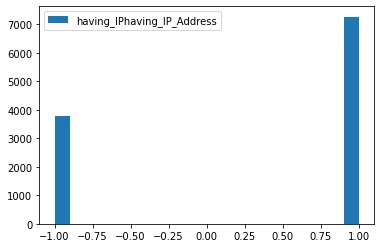

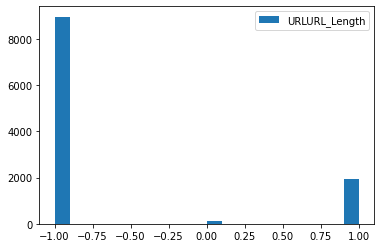

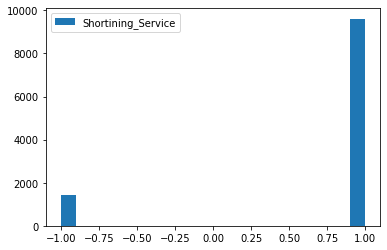

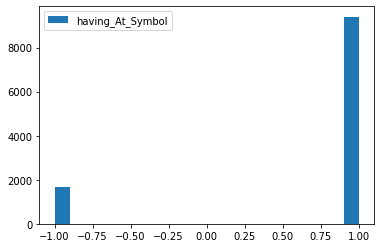

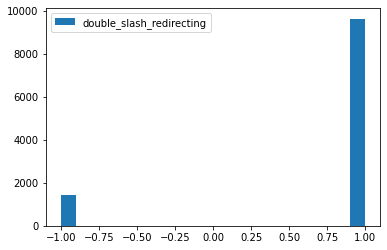

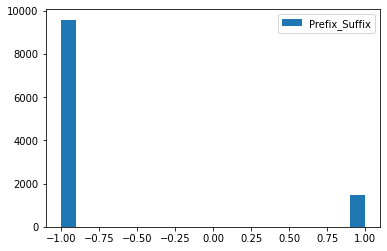

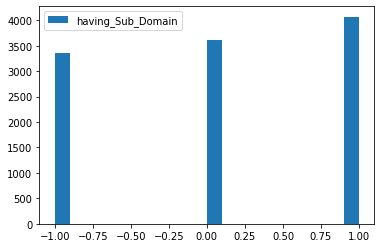

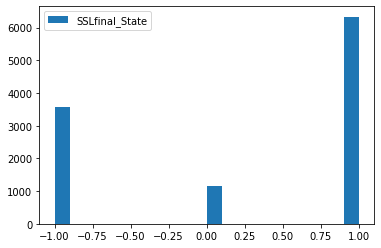

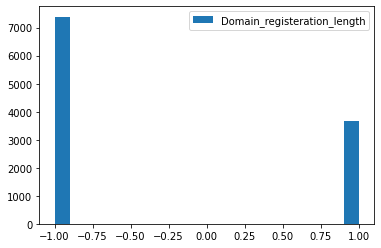

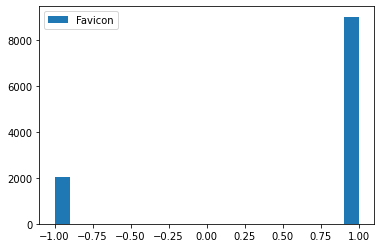

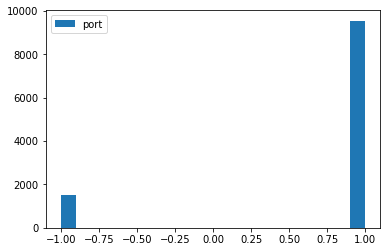

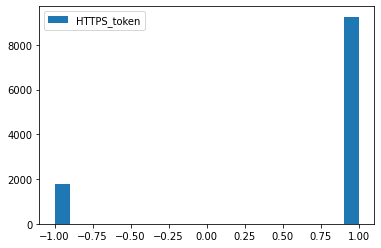

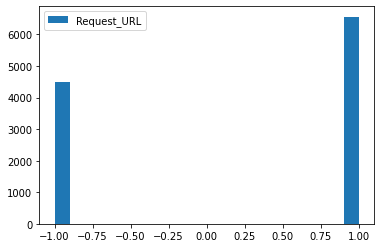

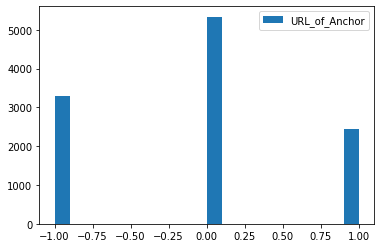

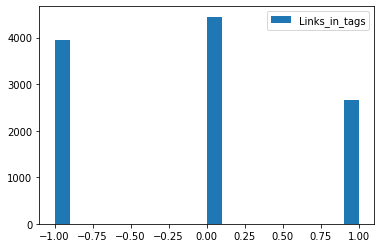

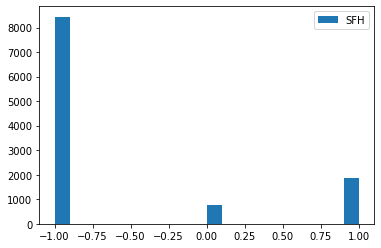

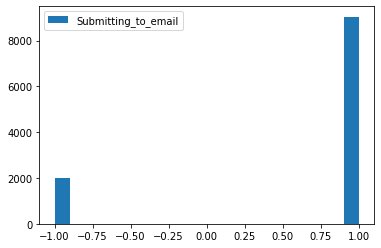

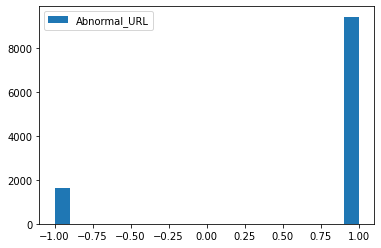

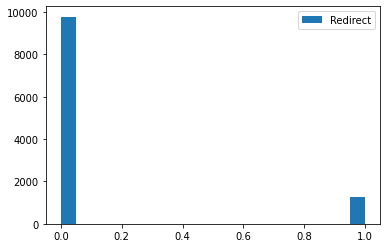

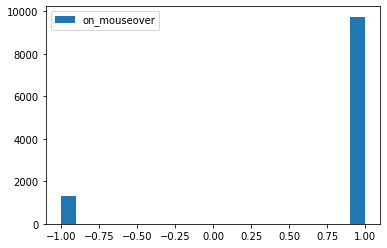

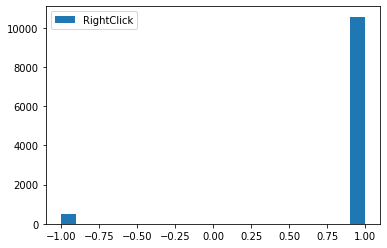

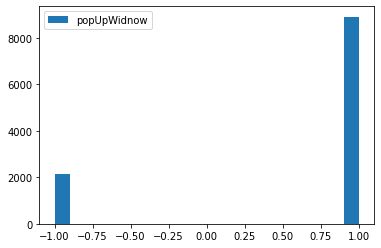

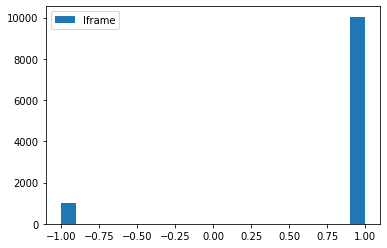

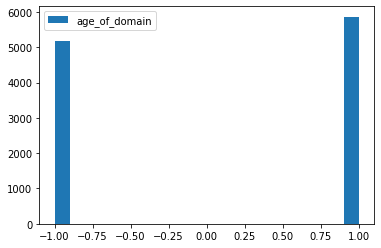

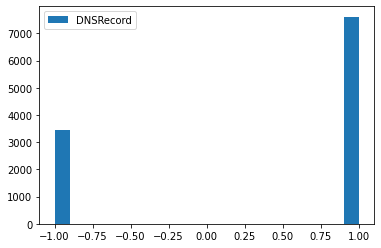

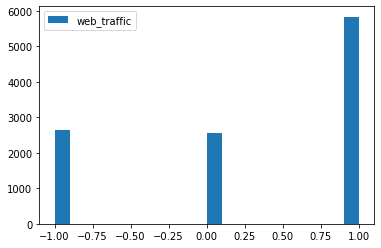

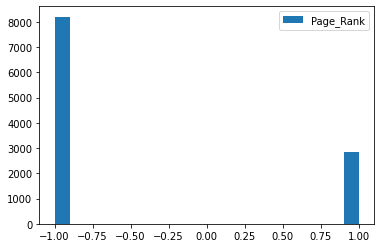

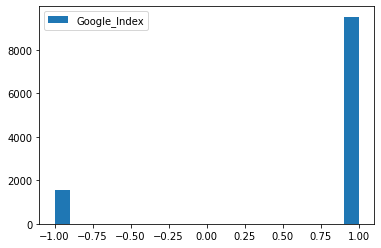

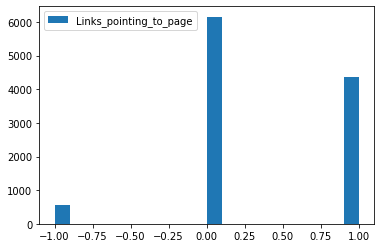

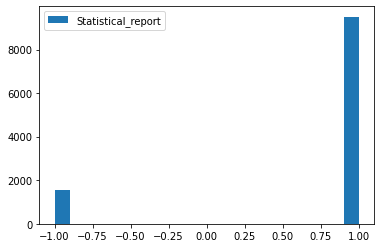

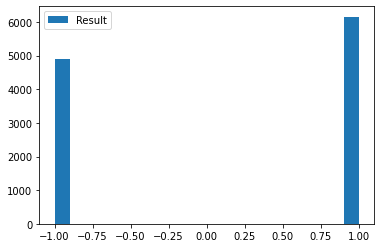

In [271]:
#the number of each unique value contained in each column
def plot_data_hist(df, columns):
  for column in columns:
    if df[column].dtype != object:
      X = np.array(df[column].values)
      _ = plt.figure()
      plt.hist(X, bins = 20)
      plt.legend([column])
      plt.show()

columns = df.columns
plot_data_hist(df, columns)

In [272]:
#Amount of phishing and legitimated websites
df["Result"].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [273]:
#Splitting data
X = df.drop('Result', axis = 1)
y = df['Result']

Since the values of all columns are presented in the interger format as -1 0 1, we can omit the part with the removal of outliers

Correlation between all the variables

In [275]:
# Convert int columns to Category columns
df = df.apply(lambda x: x.astype("category") if x.dtype == "int64" else x)
# Initialize a CamresV object using dataset
cramersv = am.CramersV(df) 

In [276]:
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
correlation_matrix = cramersv.fit()
correlation_matrix

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,0.054659,0.403461,0.158699,0.397389,0.005257,0.100734,0.089164,0.022739,0.087025,...,0.096882,0.054694,0.010446,0.050733,0.012897,0.091774,0.029153,0.411617,0.019103,0.094160
URLURL_Length,0.054659,1.000000,0.122023,0.089254,0.084550,0.073674,0.020408,0.049451,0.227623,0.044320,...,0.052656,0.015205,0.183649,0.041139,0.022753,0.184653,0.008443,0.094747,0.082991,0.072292
Shortining_Service,0.403461,0.122023,1.000000,0.104447,0.842796,0.080471,0.042102,0.062511,0.060923,0.006101,...,0.036616,0.016581,0.052596,0.436064,0.061622,0.014591,0.155844,0.283353,0.085461,0.067966
having_At_Symbol,0.158699,0.089254,0.104447,1.000000,0.086960,0.011726,0.060244,0.050385,0.015522,0.304899,...,0.290893,0.284410,0.005499,0.047872,0.040318,0.064735,0.037061,0.047201,0.080357,0.052948
double_slash_redirecting,0.397389,0.084550,0.842796,0.086960,1.000000,0.085590,0.043262,0.037068,0.047464,0.035100,...,0.054463,0.010459,0.050107,0.431409,0.079749,0.003132,0.178415,0.288073,0.070390,0.038608
Prefix_Suffix,0.005257,0.073674,0.080471,0.011726,0.085590,1.000000,0.132230,0.283614,0.096799,0.007504,...,0.014733,0.036904,0.074116,0.016556,0.148505,0.006834,0.067781,0.098179,0.002763,0.348606
having_Sub_Domain,0.100734,0.020408,0.042102,0.060244,0.043262,0.132230,1.000000,0.268555,0.105625,0.017456,...,0.028039,0.011067,0.208446,0.125502,0.060108,0.133635,0.057800,0.026600,0.092728,0.379875
SSLfinal_State,0.089164,0.049451,0.062511,0.050385,0.037068,0.283614,0.268555,1.000000,0.204091,0.025360,...,0.026648,0.031472,0.233236,0.055907,0.231362,0.110045,0.097690,0.030785,0.069123,0.777699
Domain_registeration_length,0.022739,0.227623,0.060923,0.015522,0.047464,0.096799,0.105625,0.204091,1.000000,0.054253,...,0.051410,0.004393,0.062851,0.010477,0.134470,0.059898,0.039766,0.136091,0.002212,0.225789
Favicon,0.087025,0.044320,0.006101,0.304899,0.035100,0.007504,0.017456,0.025360,0.054253,1.000000,...,0.939633,0.627607,0.002628,0.088211,0.067355,0.011699,0.016668,0.164668,0.300917,0.000280


<ipython-input-277-56a2ebc933b4>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))


Text(0.5, 1.0, 'Correlation Matrix')

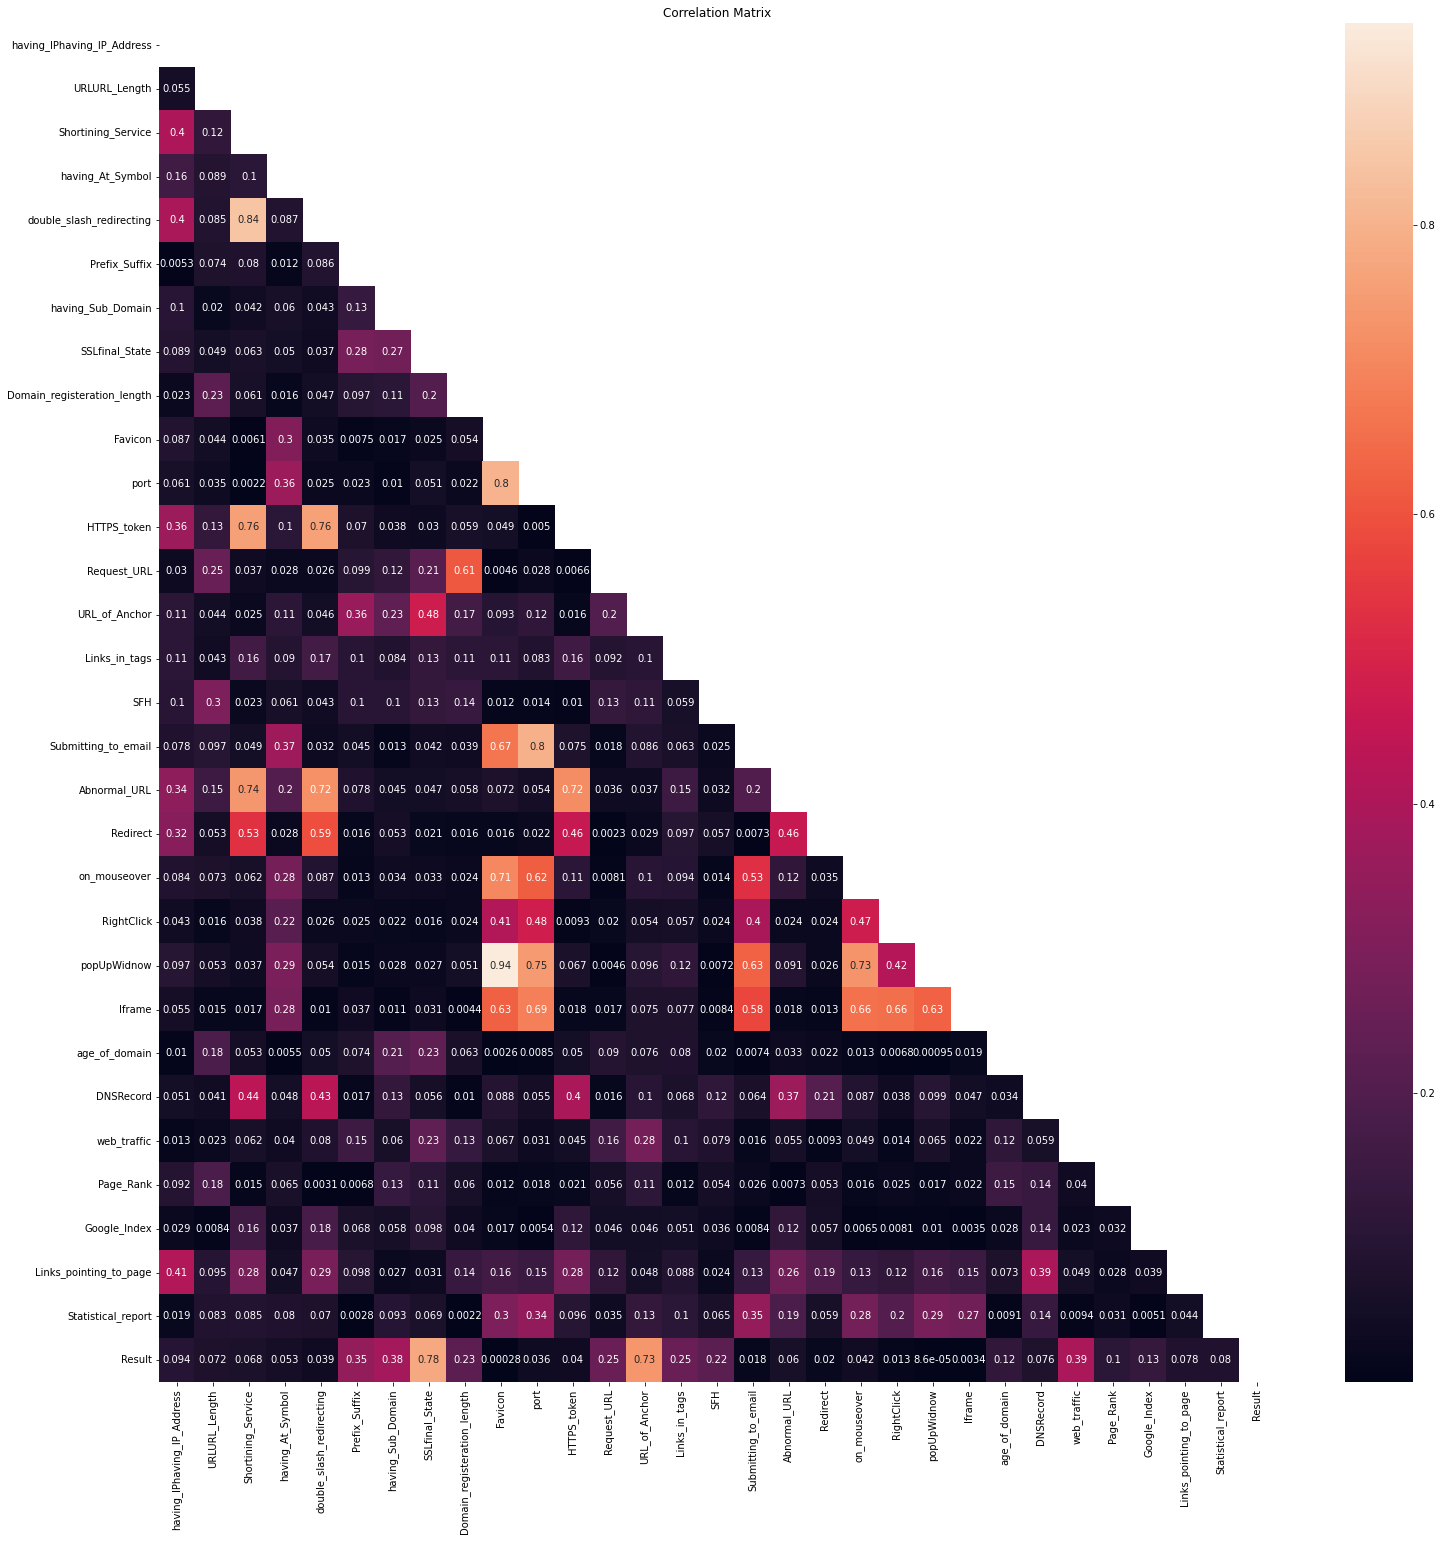

In [277]:
#Correlation figure
plt.figure(figsize=(25,25))
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True).set_title('Correlation Matrix')


In [278]:
columns = df.columns
columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [279]:
#Removing high correlated data function
def remove_correlated_columns(correlation_matrix, X):
    max_correlation_coeff_threshold = 0.75

    columns_to_remove = []
    n_features = len(X.columns)
    for i in range(n_features):
      for j in range(i+1, n_features):
        if correlation_matrix[i, j] > max_correlation_coeff_threshold:
          columns_to_remove.append(j)

    columns_to_remove_names = []
    for col_index in columns_to_remove:
      columns_to_remove_names.append(X.columns[col_index])
    X = X.drop(columns_to_remove_names, axis=1)
    print(f'{columns_to_remove_names}, ')
     
    return X

correlation_matrix = np.array(correlation_matrix)
X = remove_correlated_columns(correlation_matrix, X)

['double_slash_redirecting', 'HTTPS_token', 'HTTPS_token', 'port', 'popUpWidnow', 'Submitting_to_email'], 


In [280]:
X.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'Prefix_Suffix', 'having_Sub_Domain',
       'SSLfinal_State', 'Domain_registeration_length', 'Favicon',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'Iframe', 'age_of_domain',
       'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [281]:
#Splitting data
X = df.drop('Result', axis = 1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
# Decision Tree libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 

In [283]:
# Decision Tree
parameters = {'max_depth' : range(1,10),
              'min_samples_leaf': range(1,5)
             }

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 9, 'min_samples_leaf': 1}
0.9430125796459384


In [284]:
#Creating combinations with various of parameters
combinations = []

for max_depth in parameters["max_depth"]:
  for min_samples_leaf in parameters["min_samples_leaf"]:
    combination = {
      "max_depth": max_depth,
      "min_samples_leaf": min_samples_leaf
    }
    combinations.append(combination)

#Fit model for each combination 
models = []
for combination in combinations:
  model = DecisionTreeClassifier(**combination)
  model.fit(X_train, y_train)
  models.append(model)

#Select best model
best_model = None 
scores = []
for model in models:
  y_pred = model.predict(X_test)
  score = accuracy_score(y_true=y_test, y_pred=y_pred)
  scores.append(score)

best_model_idx = np.argsort(scores)[-1]
best_model = models[best_model_idx]
best_model_max_depth = best_model.max_depth
best_model_max_depth, best_model

(8, DecisionTreeClassifier(max_depth=8))

In [285]:
clf = DecisionTreeClassifier(max_depth=best_model_max_depth)

In [286]:
X_train.shape, X_test.shape

((8844, 30), (2211, 30))

In [287]:
clf = clf.fit(X_train, np.array(y_train, dtype=float))

[Text(0.33824190647482016, 0.9444444444444444, 'X[7] <= 0.5\ngini = 0.494\nsamples = 8844\nvalue = [3942, 4902]'),
 Text(0.1618705035971223, 0.8333333333333334, 'X[13] <= -0.5\ngini = 0.201\nsamples = 3815\nvalue = [3382, 433]'),
 Text(0.15467625899280577, 0.7222222222222222, 'gini = 0.0\nsamples = 2434\nvalue = [2434, 0]'),
 Text(0.16906474820143885, 0.7222222222222222, 'X[14] <= -0.5\ngini = 0.43\nsamples = 1381\nvalue = [948, 433]'),
 Text(0.09712230215827339, 0.6111111111111112, 'X[5] <= 0.0\ngini = 0.236\nsamples = 708\nvalue = [611, 97]'),
 Text(0.08992805755395683, 0.5, 'X[25] <= 0.5\ngini = 0.207\nsamples = 692\nvalue = [611, 81]'),
 Text(0.039568345323741004, 0.3888888888888889, 'X[11] <= 0.0\ngini = 0.128\nsamples = 364\nvalue = [339, 25]'),
 Text(0.014388489208633094, 0.2777777777777778, 'X[28] <= 0.5\ngini = 0.314\nsamples = 41\nvalue = [33, 8]'),
 Text(0.007194244604316547, 0.16666666666666666, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.02158273381294964, 0.1666

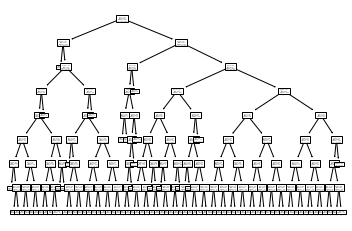

In [288]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [289]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [290]:
train_acc = accuracy_score(np.array(y_train, dtype=float), y_train_pred)
test_acc = accuracy_score(np.array(y_test, dtype=float), y_test_pred)

In [291]:
print(f"Training set accuracy: {train_acc * 100} %. Test set accuracy: {test_acc * 100} %.")

Training set accuracy: 94.2672998643148 %. Test set accuracy: 94.07507914970601 %.
